<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**How to Tell a Story Using Data - Student Project**

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Project Description:**

You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?
You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Project Description:**

**Step 1. Download the data and prepare it for analysis**
    
Download the data on restaurants in LA. Make sure that the data type for each column is correct and that there are no missing values or duplicates. Process them if necessary.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
!pip install usaddress

import usaddress

     |████████████████████████████████| 63 kB 4.3 MB/s  eta 0:00:01
     |████████████████████████████████| 840 kB 49.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 48.2 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492026 sha256=7a8313cd66be953b3c2aa7e8df10375fadb36e2a297fa467040296b6b412a215
  Stored in directory: /home/jovyan/.cache/pip/wheels/bf/5d/6a/2e53874f7ec4e2bede522385439531fafec8fafe005b5c3d1b
Successfully built future


In [3]:
rest_data = pd.read_csv('/datasets/rest_data_us.csv')
rest_data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

We see that all our columns have the proper type. We will now proceed to check for missing values and duplicates.

In [5]:
rest_data.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

We see that we have 3 missing values in the chain column. Let's examine those rows, and see if they are part of a chain or not.

In [6]:
missing_rows = rest_data[rest_data.isnull().any(axis=1)]
missing_rows

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [7]:
taco = rest_data[rest_data['object_name'] == 'TAQUERIA LOS 3 CARNALES']
print(taco)

pizza = rest_data[rest_data['object_name'] == "JAMMIN JIMMY'S PIZZA"]
print(pizza)
                  
lex = rest_data[rest_data['object_name'] == 'THE LEXINGTON THEATER']
print(lex)

         id              object_name               address chain object_type  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD   NaN  Restaurant   

      number  
7408      14  
         id           object_name              address chain object_type  \
7523  19309  JAMMIN JIMMY'S PIZZA  1641 FIRESTONE BLVD   NaN       Pizza   

      number  
7523       1  
         id            object_name       address chain object_type  number
8648  20434  THE LEXINGTON THEATER  129 E 3RD ST   NaN  Restaurant      35


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

We see that all 3 missing values appear only once, meaning they are not part of a chain. We will assign them the boolean value False.

In [8]:
rest_data[rest_data['object_name'] == 'TAQUERIA LOS 3 CARNALES'] = rest_data[rest_data['object_name'] == 'TAQUERIA LOS 3 CARNALES'].fillna(False)
rest_data[rest_data['object_name'] == "JAMMIN JIMMY'S PIZZA"] = rest_data[rest_data['object_name'] == "JAMMIN JIMMY'S PIZZA"].fillna(False)
rest_data[rest_data['object_name'] == 'THE LEXINGTON THEATER'] = rest_data[rest_data['object_name'] == 'THE LEXINGTON THEATER'].fillna(False)

In [9]:
print(rest_data[rest_data['object_name'] == 'TAQUERIA LOS 3 CARNALES'])
print(rest_data[rest_data['object_name'] == "JAMMIN JIMMY'S PIZZA"])
print(rest_data[rest_data['object_name'] == 'THE LEXINGTON THEATER'])

         id              object_name               address  chain object_type  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD  False  Restaurant   

      number  
7408      14  
         id           object_name              address  chain object_type  \
7523  19309  JAMMIN JIMMY'S PIZZA  1641 FIRESTONE BLVD  False       Pizza   

      number  
7523       1  
         id            object_name       address  chain object_type  number
8648  20434  THE LEXINGTON THEATER  129 E 3RD ST  False  Restaurant      35


In [10]:
rest_data['chain'].value_counts()

False    5975
True     3676
Name: chain, dtype: int64

In [11]:
rest_data.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

No more missing values. Let's proceed to check for duplicates.

In [12]:
rest_data.duplicated().sum()

0

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

No duplicates. Our data frame is ready for analysis.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Project Description:**

**Step 2. Data analysis**
    
* Investigate the proportions of the various types of establishments. Plot a graph.
* Investigate the proportions of chain and nonchain establishments. Plot a graph.
* Which type of establishment is typically a chain?
* What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
* Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
* Put the data on street names from the address column in a separate column.
* Plot a graph of the top ten streets by number of restaurants.
* Find the number of streets that only have one restaurant.
* For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64


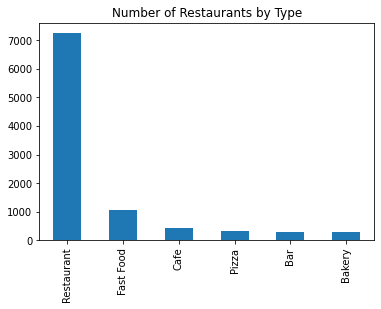

In [13]:
print(rest_data['object_type'].value_counts())
rest_data['object_type'].value_counts().plot(kind='bar')
plt.title('Number of Restaurants by Type')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

Most types in our data are restaurants, and by a significant margin.

False    5975
True     3676
Name: chain, dtype: int64


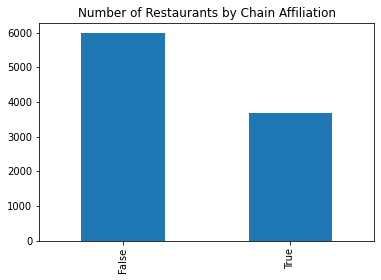

In [14]:
print(rest_data['chain'].value_counts())
rest_data['chain'].value_counts().plot(kind='bar')
plt.title('Number of Restaurants by Chain Affiliation')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

When checking for chain affiliation, we see that most establishments in our data are not part of a chain.

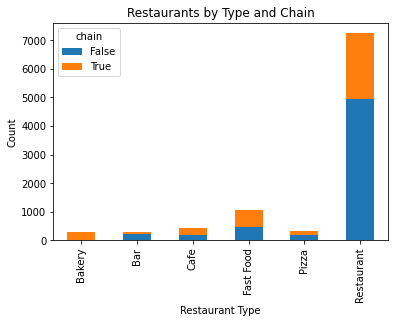

In [15]:
rest_type_chain = rest_data.groupby(['object_type', 'chain']).size().unstack()

rest_type_chain.plot(kind='bar', stacked=True)
plt.title('Restaurants by Type and Chain')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.show()

In [16]:
rest_type_chain

chain,False,True
object_type,,
Bakery,NaN,283.0
Bar,215.0,77.0
Cafe,169.0,266.0
Fast Food,461.0,605.0
Pizza,167.0,153.0
Restaurant,4963.0,2292.0


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

From the graph and table above, we see that most fast food and cafe establishments are affiliated with a chain.

Bars and restaurants are mostly non affiliated with chains.

Pizza parlors are pretty even when it comes to chain affiliation.

What is somewhat surprising is that all the bakeries in our data are affiliated with a chain.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

To find out what characterizes chains (many establishments with a small number of seats or a few establishments with a lot of seats), we will create a function that will assign a seat number category to each establishment (whether it is part of a chain or not).
    

We will then create a slice that only shows us the restaurants that are chains.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

To find out our upper limit, we will check for the maximum number of seats (in a chain and in general).

In [17]:
def assign_seat_number_category(seats):
    if 1<=seats<=6:
        return 'tiny'
    if 7<=seats<=20:
        return 'small'
    if 21<=seats<=40:
        return 'smallish'
    if 41<=seats<=75:
        return 'medium'
    if 76<=seats<=150:
        return 'large'
    if 151<=seats<=229:
        return 'huge'
        
rest_data['seat_number_category'] = rest_data['number'].apply(assign_seat_number_category)
rest_data

,id,object_name,address,chain,object_type,number,seat_number_category
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,smallish
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,small
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,small
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,smallish
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,small
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,large
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,large
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,small
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,tiny


In [18]:
rest_chain_seats = rest_data[rest_data['chain'] == True]
rest_chain_seats

,id,object_name,address,chain,object_type,number,seat_number_category
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1,tiny
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,smallish
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17,small
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133,large
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,smallish
...,...,...,...,...,...,...,...
9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,True,Bakery,10,small
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD # A-B,True,Restaurant,47,medium
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135,large
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,small


In [19]:
print(rest_chain_seats['number'].max())
rest_data['number'].max()

229


229

smallish    1108
small       1040
medium       535
tiny         438
large        422
huge         133
Name: seat_number_category, dtype: int64


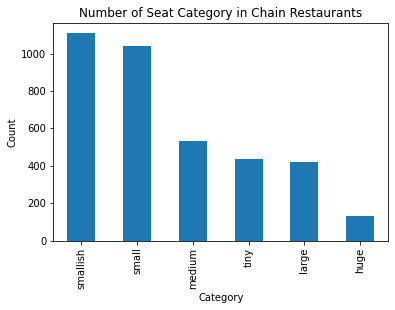

In [20]:
print(rest_chain_seats['seat_number_category'].value_counts())
rest_chain_seats['seat_number_category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Seat Category in Chain Restaurants')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

From the graph and value counts above, we see that most chain establishments are either smallish(21-40 seats) or small (7-20).

Therefore, we arrive at the conclusion that most chains are characterized with many establishments with a small(ish) number of seats.

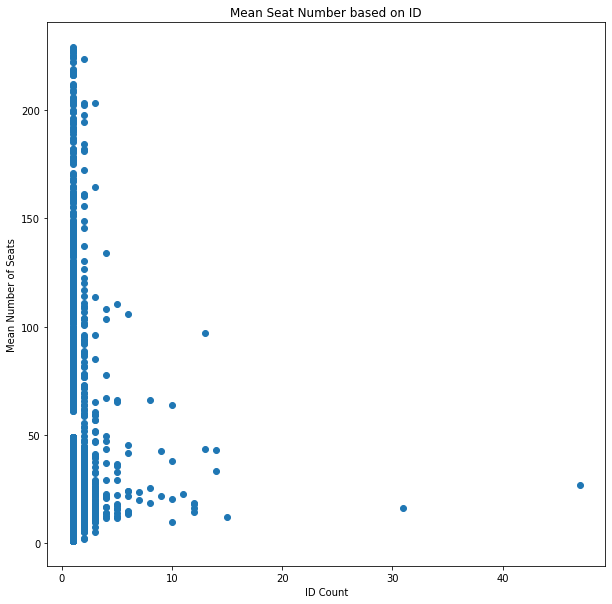

In [53]:
rest_chain_seats_new = rest_chain_seats.groupby('object_name').agg({'id' : 'count', 'number' : 'mean'})
plt.figure(figsize=(10,10))
plt.scatter(rest_chain_seats_new['id'], rest_chain_seats_new['number'])
plt.xlabel('ID Count')
plt.ylabel('Mean Number of Seats')
plt.title('Mean Seat Number based on ID')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

From the scatter plot above, we see that most chains have 1-3 establishments, with varying degrees of average seat numbers.

In [22]:
rest_data

,id,object_name,address,chain,object_type,number,seat_number_category
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,smallish
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,small
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,small
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,smallish
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,small
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,large
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,large
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,small
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,tiny


In [23]:
rest_data['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

object_type
Bakery        21.773852
Bar           44.767123
Cafe          25.000000
Fast Food     31.837711
Pizza         28.459375
Restaurant    48.042316
Name: number, dtype: float64


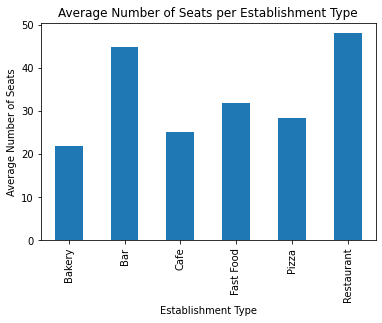

In [24]:
average_seats_by_type = rest_data.groupby('object_type')['number'].mean()
average_seats_by_type.sort_values(ascending=False)
print(average_seats_by_type)
average_seats_by_type.plot(kind='bar')
plt.xlabel('Establishment Type')
plt.ylabel('Average Number of Seats')
plt.title('Average Number of Seats per Establishment Type')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

From the graph and table above, we see that the establishments with the highest average number of seats are restaurants and bars.

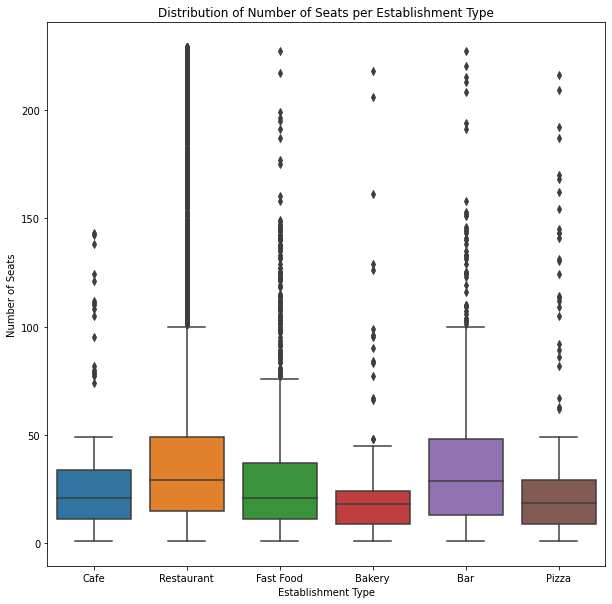

In [25]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='object_type', y='number', data=rest_data)
plt.title('Distribution of Number of Seats per Establishment Type')
plt.xlabel('Establishment Type')
plt.ylabel('Number of Seats')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

From the boxplot above, we can detect a significant variance across all establishment types. All of the types have a significcant number of outliers. 

If we look only at the boxes, we see that cafes and bakeries are the most "normally" distributed types.

In [26]:
def cleaning_final(raw):
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA,Los Angeles,USA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='1033 1/2 LOS ANGELES ST,Los Angeles,USA'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=dict_address['AddressNumber']+" "+str(dict_address['StreetName'])+str(', Los Angeles,USA')
    return clean_adress

In [27]:
rest_data['clean_street_final']=rest_data.address.apply(cleaning_final)
rest_data

,id,object_name,address,chain,object_type,number,seat_number_category,clean_street_final
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,smallish,"3708 ROCK, Los Angeles,USA"
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,small,"100 WORLD, Los Angeles,USA"
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,small,"6801 HOLLYWOOD, Los Angeles,USA"
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,smallish,"1814 SUNSET, Los Angeles,USA"
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,small,"2100 PARK, Los Angeles,USA"
...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,large,"217 TEMPLE, Los Angeles,USA"
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,large,"5750 MELROSE, Los Angeles,USA"
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,small,"6741 HOLLYWOOD, Los Angeles,USA"
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,tiny,"548 SPRING, Los Angeles,USA"


In [28]:
data = rest_data['clean_street_final']
df = pd.DataFrame(data)
df['words'] = rest_data['clean_street_final'].str.split()

rest_data['street_name_only'] = df['words'].str[1]
rest_data['street_name_only'] = rest_data['street_name_only'].str.replace(r'[^\w\s]+', '')
rest_data

/tmp/ipykernel_55/1919704858.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  rest_data['street_name_only'] = rest_data['street_name_only'].str.replace(r'[^\w\s]+', '')


,id,object_name,address,chain,object_type,number,seat_number_category,clean_street_final,street_name_only
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,smallish,"3708 ROCK, Los Angeles,USA",ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,small,"100 WORLD, Los Angeles,USA",WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,small,"6801 HOLLYWOOD, Los Angeles,USA",HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,smallish,"1814 SUNSET, Los Angeles,USA",SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,small,"2100 PARK, Los Angeles,USA",PARK
...,...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,large,"217 TEMPLE, Los Angeles,USA",TEMPLE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,large,"5750 MELROSE, Los Angeles,USA",MELROSE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,small,"6741 HOLLYWOOD, Los Angeles,USA",HOLLYWOOD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,tiny,"548 SPRING, Los Angeles,USA",SPRING


SUNSET       404
WILSHIRE     398
PICO         370
WESTERN      369
FIGUEROA     334
OLYMPIC      309
VERMONT      288
MONICA       264
3RD          263
HOLLYWOOD    253
Name: street_name_only, dtype: int64


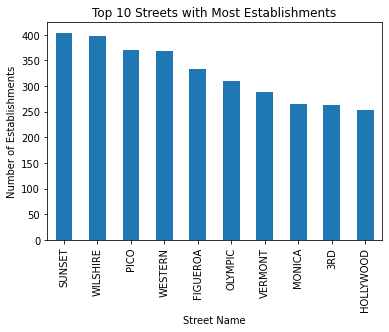

In [29]:
street_data = rest_data['street_name_only'].value_counts()
top_ten_streets = street_data.head(10)
print(top_ten_streets)
top_ten_streets.plot(kind='bar')
plt.xlabel('Street Name')
plt.ylabel('Number of Establishments')
plt.title('Top 10 Streets with Most Establishments')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

The table and graph above are pretty self explanatory.

In [30]:
rest_street_counts = rest_data.groupby('street_name_only').size().reset_index(name='restaurant_count')

single_restaurant_streets = rest_street_counts[rest_street_counts['restaurant_count'] == 1]

num_single_restaurant_streets = len(single_restaurant_streets)

(f"There are {num_single_restaurant_streets} streets that only have one restaurant.")

'There are 186 streets that only have one restaurant.'

In [31]:
top_streets_list = ['SUNSET', 'WILSHERE', 'PICO', 'WESTERN', 'FIGUEROA', 'OLYMPIC', 'VERMONT', 'MONICA', '3RD', 'HOLLYWOOD']

top_ten_streets_seats = rest_data[rest_data['street_name_only'].isin(top_streets_list)]
top_ten_streets_seats

,id,object_name,address,chain,object_type,number,seat_number_category,clean_street_final,street_name_only
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,small,"6801 HOLLYWOOD, Los Angeles,USA",HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,smallish,"1814 SUNSET, Los Angeles,USA",SUNSET
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,smallish,"5319 SUNSET, Los Angeles,USA",SUNSET
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17,small,"928 WESTERN, Los Angeles,USA",WESTERN
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,smallish,"2501 SUNSET, Los Angeles,USA",SUNSET
...,...,...,...,...,...,...,...,...,...
9634,21420,MILD SAUCE,8500 W OLYMPIC BLVD STE B,False,Restaurant,15,small,"8500 OLYMPIC, Los Angeles,USA",OLYMPIC
9635,21421,THE TEA & COFFEE EXCHANGE,6801 HOLLYWOOD BLVD # 120,False,Cafe,4,tiny,"6801 HOLLYWOOD, Los Angeles,USA",HOLLYWOOD
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135,large,"1800 WESTERN, Los Angeles,USA",WESTERN
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD # 1025,False,Restaurant,225,huge,"10250 MONICA, Los Angeles,USA",MONICA


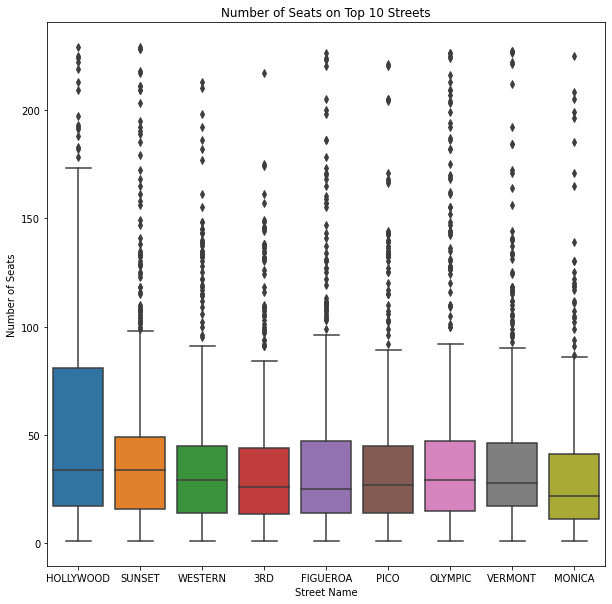

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(x='street_name_only', y='number', data=top_ten_streets_seats)
plt.xlabel('Street Name')
plt.ylabel('Number of Seats')
plt.title('Number of Seats on Top 10 Streets')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

From the distribution above, we see that we have a lot of values larger than the upper whisker. 

We can see that the medain is pretty similar across all top streets.
    
The noticeable trend for all these streets is that there are fewer small and smallish establishments. 

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Project Description:**

**Step 3. Preparing a presentation**
    
Make a presentation of your research to share with investors. You can use any tool you’d like (for example Google Slides or MS PowerPoint) to create it, but you must convert your presentation to PDF format for assessment. Include a link to the presentation in a markdown cell in the following format:
    
Presentation: <link to cloud storage>
    
Follow the formatting guidelines from the “Preparing Presentations” chapter.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

Below this cell, I will plot additional graphs that only refer to cafes, as per the requirements of the project. The graphs and data will be inserted and featured in the presentation.

In [33]:
cafe_data = rest_data[rest_data['object_type'] == 'Cafe']
cafe_data

,id,object_name,address,chain,object_type,number,seat_number_category,clean_street_final,street_name_only
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,smallish,"3708 ROCK, Los Angeles,USA",ROCK
53,11839,PRIME GRIND COFFEE,714 W 1ST ST,False,Cafe,4,tiny,"714 1ST, Los Angeles,USA",1ST
102,11888,CIVIL COFFEE,5629 N FIGUEROA ST,False,Cafe,17,small,"5629 FIGUEROA, Los Angeles,USA",FIGUEROA
121,11907,ANTIGUA CULTURAL COFFEE,3400 N FIGUEROA ST,False,Cafe,24,smallish,"3400 FIGUEROA, Los Angeles,USA",FIGUEROA
123,11909,MARIE'S COFFEE AND DELI,731 W 7TH ST,True,Cafe,36,smallish,"731 7TH, Los Angeles,USA",7TH
...,...,...,...,...,...,...,...,...,...
9598,21384,GOOD PEOPLE COFFEE CO,11609 SANTA MONICA BLVD,False,Cafe,2,tiny,"11609 MONICA, Los Angeles,USA",MONICA
9610,21396,TERRAZA CAFE COFFEE SHOP,4017 1/2 CITY TERRACE DR,False,Cafe,1,tiny,"4017 TERRACE, Los Angeles,USA",TERRACE
9623,21409,310 COFFEE COMPANY,11623 WASHINGTON PL,False,Cafe,12,small,"11623 WASHINGTON, Los Angeles,USA",WASHINGTON
9635,21421,THE TEA & COFFEE EXCHANGE,6801 HOLLYWOOD BLVD # 120,False,Cafe,4,tiny,"6801 HOLLYWOOD, Los Angeles,USA",HOLLYWOOD


small       153
smallish    144
tiny         63
medium       59
large        16
Name: seat_number_category, dtype: int64


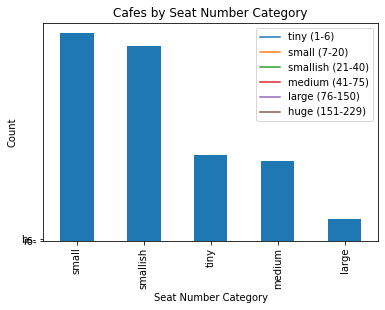

In [34]:
print(cafe_data['seat_number_category'].value_counts())
cafe_data['seat_number_category'].value_counts().plot(kind='bar')
labels = ['tiny (1-6)', 'small (7-20)', 'smallish (21-40)', 'medium (41-75)', 'large (76-150)', 'huge (151-229)']
ranges = [(1, 6), (7, 20), (21, 40), (41, 75), (76, 150), (151, 229)]

for i in range(len(labels)):
    plt.plot('ro-', label=labels[i] if i == 0 else None)
    plt.plot('bs-', label=labels[i] if i == 0 else None)
    
plt.legend(labels=labels, loc='best')
plt.title('Cafes by Seat Number Category')
plt.ylabel('Count')
plt.xlabel('Seat Number Category')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

Cafes graphed by their seat number category.

In [35]:
top_ten_street_cafe_for_list = cafe_data['street_name_only'].value_counts().head(10)
top_ten_street_cafe_for_list

WORLD        28
SUNSET       28
WILSHIRE     25
HOLLYWOOD    14
PICO         13
3RD          13
MONICA       12
WESTERN      12
OLYMPIC      11
BEVERLY      11
Name: street_name_only, dtype: int64

In [36]:
top_streets_list_cafe = ['WORLD', 'SUNSET', 'WILSHIRE', 'HOLLYWOOD', 'PICO', '3RD', 'WESTERN', 'MONICA', 'OLYMPIC', 'BEVERLY']

top_ten_streets_cafe = cafe_data[cafe_data['street_name_only'].isin(top_streets_list_cafe)]
top_ten_streets_cafe

,id,object_name,address,chain,object_type,number,seat_number_category,clean_street_final,street_name_only
155,11941,MILLIE'S COFFEE SHOP,3524 W SUNSET BLVD,False,Cafe,22,smallish,"3524 SUNSET, Los Angeles,USA",SUNSET
156,11942,ANDANTE COFFEE ROASTERS,2201 W SUNSET BLVD,True,Cafe,4,tiny,"2201 SUNSET, Los Angeles,USA",SUNSET
495,12281,STARBUCKS COFFEE #6688,1601 WILSHIRE BLVD,True,Cafe,37,smallish,"1601 WILSHIRE, Los Angeles,USA",WILSHIRE
570,12356,LAMILL COFFEE,380 WORLD WAY,False,Cafe,9,small,"380 WORLD, Los Angeles,USA",WORLD
600,12386,PEET'S COFFEE ANGEL CITY,300 WORLD WAY,True,Cafe,33,smallish,"300 WORLD, Los Angeles,USA",WORLD
...,...,...,...,...,...,...,...,...,...
9307,21093,THE COFFEE BEAN & TEA LEAF - ARRIVAL,380 WORLD WAY STE T86,True,Cafe,5,tiny,"380 WORLD, Los Angeles,USA",WORLD
9322,21108,THE COFFEE BEAN & TEA LEAF,500 WORLD WAY,True,Cafe,26,smallish,"500 WORLD, Los Angeles,USA",WORLD
9449,21235,CLOVE COFFEE,5007 W PICO BLVD,False,Cafe,8,small,"5007 PICO, Los Angeles,USA",PICO
9598,21384,GOOD PEOPLE COFFEE CO,11609 SANTA MONICA BLVD,False,Cafe,2,tiny,"11609 MONICA, Los Angeles,USA",MONICA


WORLD        28
SUNSET       28
WILSHIRE     25
HOLLYWOOD    14
PICO         13
3RD          13
MONICA       12
WESTERN      12
OLYMPIC      11
BEVERLY      11
Name: street_name_only, dtype: int64


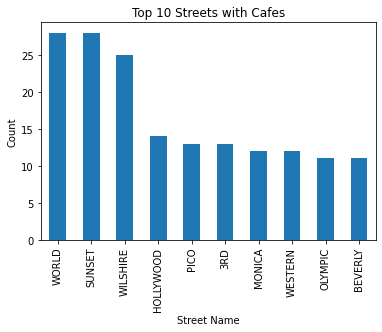

In [37]:
print(top_ten_streets_cafe['street_name_only'].value_counts())

top_ten_streets_cafe['street_name_only'].value_counts().plot(kind='bar')
plt.title('Top 10 Streets with Cafes')
plt.ylabel('Count')
plt.xlabel('Street Name')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

Top 10 streets that have the most cafes in them.

In [38]:
cafe_chain = top_ten_streets_cafe.groupby(['street_name_only', 'chain']).size().unstack()
cafe_chain

chain,False,True
street_name_only,,
3RD,7,6
BEVERLY,4,7
HOLLYWOOD,7,7
MONICA,4,8
OLYMPIC,4,7
PICO,5,8
SUNSET,13,15
WESTERN,6,6
WILSHIRE,3,22


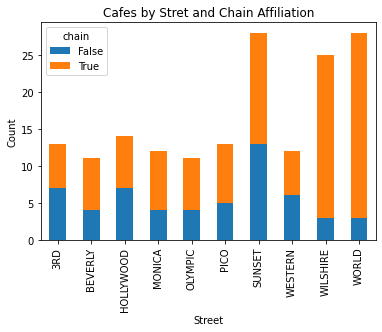

In [39]:
cafe_chain.plot(kind='bar', stacked=True)
plt.title('Cafes by Stret and Chain Affiliation')
plt.xlabel('Street')
plt.ylabel('Count')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

The graph and table above show us the distribution of cafes, their affiliation with a chain, and located on the top 10 streets with the most cafes in them.

In [40]:
from ipywidgets import FileUpload

uploader = FileUpload()
display(uploader)


FileUpload(value={}, description='Upload')

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

New link to presentation (PDF): https://drive.google.com/file/d/1gYWWCCeAXXQ7Phu8wVBIpeG3VyDsU9AD/view?usp=share_link

Link for presentation (PPT): https://docs.google.com/presentation/d/1n9GSKWRrjPzKONSdt1K7sZe1L2RPA5k5/edit?usp=share_link&ouid=112231740145194072337&rtpof=true&sd=true

In [41]:
with open('filename.txt', 'wb') as f:
    f.write(uploader.data[0])

IndexError: list index out of range

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    

**General Conclusion**
    
By examining the data and taking into account the tasks posed, we can arrive at the following conclusions:
    
* Most establishments are restaurants.
    
* Most establishments are not affiliated with a chain (except for bakeries).
    
* Most establishments seated up to 40 people (small or smallish by category). Restaurants and fast food establishments had a stronger correlation with the number of seats, compared with the other types.
    
* For conclusions regarding cafes, please see the attached presentation.
